In [ ]:
# Import necessary packages
import os,sys
import tensorflow as tf

sys.path.append("..")
# Import necessary files/functions
from VisualizingData.VisualizeData import init_metadata, read_metadata, visualize_metadata
                                                    
from LoadingData.LoadData import load_to_dataframe, single_benign_example_ourDS, single_malicious_example_ourDS
from Training.TrainGAN import train, display_training_predictions, plot_loss_functions
from Models.Discriminator import visualize_mal_prediction, visualize_ben_prediction

In [ ]:
# Declaring a variable for the path to the Ember dataset
dataset_dir = "C:\Programming\python_work\Qmind\data"

In [ ]:
# Declaring hyperparameters for Epoch and the floor value for Batch Size
EPOCH = 40
BATCH_SIZE_FLOOR = 390
NUM_LOAD_FILES = 10000

In [ ]:
# Train the models
generator, discriminator, training_predictions, loss_value_lists = train(EPOCH, BATCH_SIZE_FLOOR, NUM_LOAD_FILES, "C:\Programming\python_work\Qmind\data",".ipynb_checkpoints/",False)

In [ ]:
# Define the number of malicious and benign predictions made during training
predicted_benign = training_predictions[0]
predicted_malicious = training_predictions[1]

# Display the number of files predicted as malicious or benign during training in a pie chart
display_training_predictions(predicted_benign, predicted_malicious)

In [ ]:
# Define the lists of generator loss values and discriminator loss values from tuple output during training
generator_loss_list = loss_value_lists[0]
discriminator_loss_list = loss_value_lists[1]

# Display the lists of lost values for each model taken at each epoch
print("Generator Loss Values: {}".format(generator_loss_list))
print("Discriminator Loss Values: {}".format(discriminator_loss_list))

# Plot the loss values for both models
plot_loss_functions(generator_loss_list, discriminator_loss_list, EPOCH)

In [37]:
# Load individual examples of both malicious files and benign 
mal_example = single_malicious_example_ourDS(dataset_dir)
ben_example = single_benign_example_ourDS(dataset_dir)

malicious = tf.expand_dims(mal_example, 0)
benign = tf.expand_dims(ben_example, 0)

#See what mal_example and ben_example are
print(mal_example)
print(ben_example)

[0.05828536 0.00884046 0.00699013 ... 0.         0.         0.        ]
[0.54825366 0.01367188 0.00241268 ... 0.         0.         0.        ]


In [38]:
# Pass the malicious and benign examples into the discriminator to get predictions on file type
mal_prediction = discriminator.predict_on_batch([malicious])
ben_prediction = discriminator.predict_on_batch([benign])

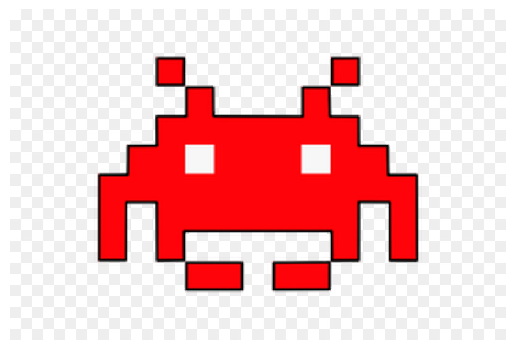

Prediction on Malicious Vectorized Features: [[1.0]]


In [39]:
# Print the features of the malicious and benign files being used at this step
if mal_prediction.numpy() < [[0.5]]:
    label = [[0.]]
    visualize_ben_prediction()
elif mal_prediction.numpy() >= [[0.5]]:
    label = [[1.]]
    visualize_mal_prediction()

print("Prediction on Malicious Vectorized Features: {}".format(label))

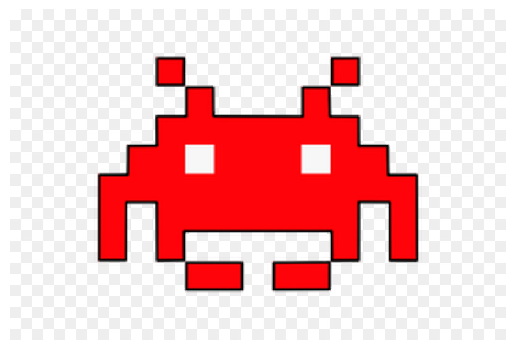

Prediction on Benign Vectorized Features: [[1.0]]


In [40]:
# Print the features of the malicious and benign files being used at this step
if ben_prediction.numpy() < [[0.5]]:
    label = [[0.]]
    visualize_ben_prediction()
elif ben_prediction.numpy() >= [[0.5]]:
    label = [[1.]]
    visualize_mal_prediction()
    
print("Prediction on Benign Vectorized Features: {}".format(label))

In [41]:
# Create a tensor of random noise to pass into the generator 
noise = tf.random.uniform([1, 2381])

# Pass the malicious file through the generator and test the output against the discriminator
adversarial_example = generator.predict_on_batch([malicious, noise])
print(adversarial_example.numpy())

[[0.05828536 1.         1.         ... 0.         1.         0.        ]]


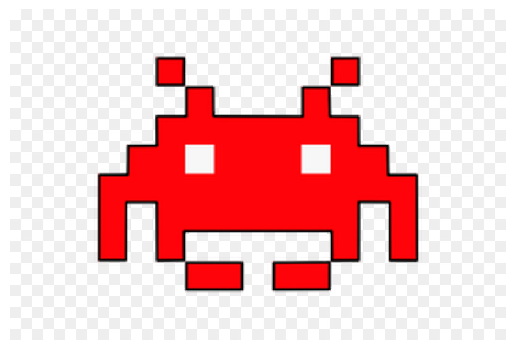

Prediction: [[1.0]]


In [42]:
# Use the discriminator to make prediction on the output adversarial example
adversarial_prediction = discriminator.predict_on_batch([adversarial_example])
if adversarial_prediction.numpy() < [[0.5]]:
    label = [[0.]]
    visualize_ben_prediction()
elif adversarial_prediction.numpy() >= [[0.5]]:
    label = [[1.]]
    visualize_mal_prediction()
print("Prediction: {}".format(label))